In [1]:
import numpy as np
import pandas as pd
#Encodeurs
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler, PolynomialFeatures
#Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
#Estimateurs
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
data = pd.read_csv('data/bronze.csv')

In [3]:
data.CHAS = data.CHAS.map({True: 1, False: 0})

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
X = data.drop(['MEDV'], axis=1)
y = data.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [6]:
numerical_features = X.select_dtypes(include=['int','float']).columns

In [7]:
std = StandardScaler()
minmax = MinMaxScaler()
rbst = RobustScaler()

scalers = [std, minmax, rbst]


In [8]:
lnr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
gbr = GradientBoostingRegressor()

In [9]:
scaler = minmax

estimator = GradientBoostingRegressor(
    subsample = 0.8,
    n_estimators=500,
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=3,
    learning_rate=0.09000000000000001
    )

In [10]:
preprocessor = make_column_transformer(
    (scaler, numerical_features),
    remainder='passthrough'
)

In [11]:
pipeline = make_pipeline(
    preprocessor,
    estimator
)

In [12]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object'))])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.09000000000000001,
                                           min_samples_leaf=2,
                                           min_samples_split=5,
                                           n_estimators=500, subsample=0.8))])

In [13]:
score = pipeline.score(X_test, y_test)
score


0.9132063960712857

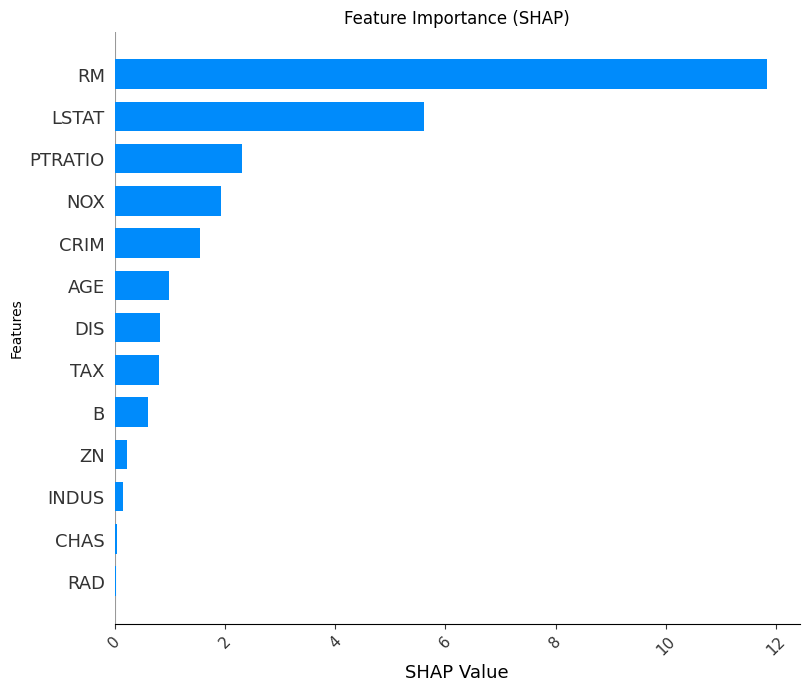

In [15]:
import shap
import matplotlib.pyplot as plt

# Extraction du modèle final du pipeline
model = pipeline.named_steps['gradientboostingregressor']

# Calcul des valeurs SHAP
explainer = shap.Explainer(model, feature_perturbation='interventional')
shap_values = explainer.shap_values(X_test)

# Tracé de la visualisation SHAP
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Feature Importance (SHAP)")
plt.xlabel("SHAP Value")
plt.ylabel("Features")
plt.xticks(rotation=45)
plt.show()



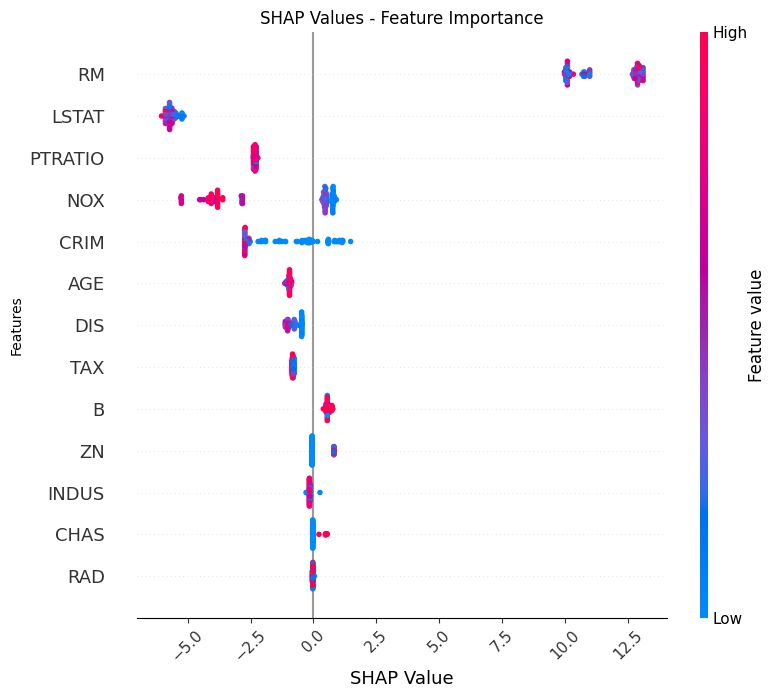

In [19]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Extraction du modèle final du pipeline
model = pipeline.named_steps['gradientboostingregressor']

# Calcul des valeurs SHAP
explainer = shap.Explainer(model, feature_perturbation='interventional')
shap_values = explainer.shap_values(X_test)

# Tracé de la visualisation SHAP avec influences positives et négatives
shap.summary_plot(shap_values, X_test, plot_type="dot", show=False, color=sns.color_palette("dark"))

plt.title("SHAP Values - Feature Importance")
plt.xlabel("SHAP Value")
plt.ylabel("Features")
plt.xticks(rotation=45)

plt.show()
